# Sharp Ratio & Frontier

In [1]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from datetime import date

%matplotlib inline

ds_yahoo = 'yahoo'

last_year = datetime.datetime.now().year - 1
#start = datetime.datetime.now().replace(year=last_year)
start = date(date.today().year, 1, 1)
end = datetime.datetime.now()

## Portfolio Atual

### Pegando os dados na API do Yahoo

In [2]:
tickers = ['USIM5.SA','TIET11.SA','ENBR3.SA','ITUB4.SA','ABCB4.SA','LEVE3.SA','ABEV3.SA','FLRY3.SA',
           'ODPV3.SA','PSSA3.SA','WHRL3.SA','ROMI3.SA']

usim = web.DataReader(tickers[0], ds_yahoo, start, end)
tiet = web.DataReader(tickers[1], ds_yahoo, start, end)
enbr = web.DataReader(tickers[2], ds_yahoo, start, end)
itub = web.DataReader(tickers[3], ds_yahoo, start, end)
abc = web.DataReader(tickers[4], ds_yahoo, start, end)
leve = web.DataReader(tickers[5], ds_yahoo, start, end)
abev = web.DataReader(tickers[6], ds_yahoo, start, end)
flry = web.DataReader(tickers[7], ds_yahoo, start, end)
odpv = web.DataReader(tickers[8], ds_yahoo, start, end)
pssa = web.DataReader(tickers[9], ds_yahoo, start, end)
whrl = web.DataReader(tickers[10], ds_yahoo, start, end)
romi = web.DataReader(tickers[11], ds_yahoo, start, end)

## Normalizando o retorno diário de cada ativo do portfólio

In [3]:
for acao_df in (usim,tiet,enbr,itub,abc,leve,abev,flry,odpv,pssa,whrl,romi):
    acao_df['Retorno Normalizado'] = acao_df['Adj Close'] / acao_df.iloc[0]['Adj Close']

## Alocando cada ativo com um peso específico

In [4]:
pesos = [.550, 1.145, .439, 1.446, .218, .968, .694, 1.144, .164, 2.328, .878, .026]

for acao_df, alocacao in zip((usim,tiet,enbr,itub,abc,leve,abev,flry,odpv,pssa,whrl,romi), pesos):
    acao_df['Alocacao'] = acao_df['Retorno Normalizado'] * alocacao

## Posição de cada ativo no portfólio

In [5]:
for acao_df in usim,tiet,enbr,itub,abc,leve,abev,flry,odpv,pssa,whrl,romi:
    acao_df['Posicao'] = acao_df['Alocacao'] * 10000

In [6]:
todas_posicoes = usim['Posicao'],tiet['Posicao'],enbr['Posicao'],itub['Posicao'],abc['Posicao'],leve['Posicao'],abev['Posicao'],flry['Posicao'],odpv['Posicao'],pssa['Posicao'],whrl['Posicao'], romi['Posicao']

# DF que terá colunas adicionadas como Total e Retorno Diário
portfolio_posicao = pd.concat(todas_posicoes, axis=1)

# DF que terá apenas as ações com o Adj Close column
portfolio_acoes = pd.concat(todas_posicoes, axis=1)

In [7]:
portfolio_posicao.columns = ['usim','tiet','enbr','itub','abc','leve','abev','flry','odpv','pssa','whrl','romi']
portfolio_acoes.columns = ['usim','tiet','enbr','itub','abc','leve','abev','flry','odpv','pssa','whrl','romi']

## Desempenho da carteira

In [8]:
portfolio_posicao['Total'] = portfolio_posicao.sum(axis=1)

In [9]:
print('Investimento inicial:')
print(portfolio_posicao['Total'][0])
print('Investimento final:')
print(round(portfolio_posicao['Total'][-1], 2))

Investimento inicial:
100000.0
Investimento final:
64754.36


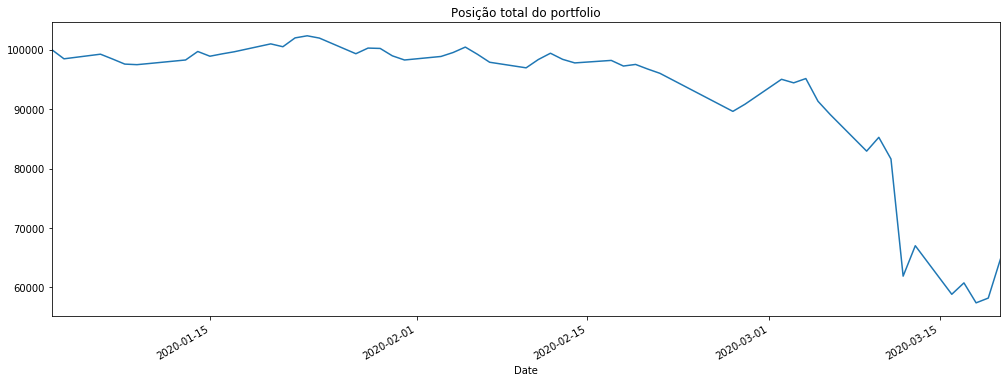

In [10]:
portfolio_posicao['Total'].plot(figsize=(17,6))
plt.title('Posição total do portfolio');

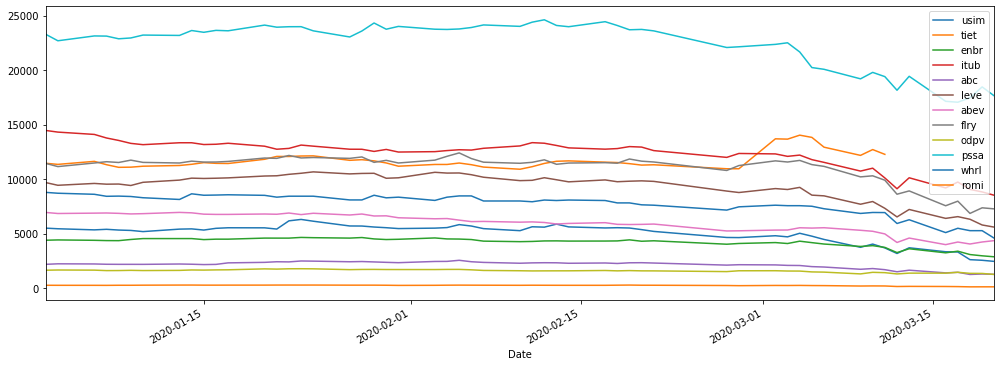

In [11]:
portfolio_acoes.plot(figsize=(17,6));

## Desempenho da Carteira Normalizada

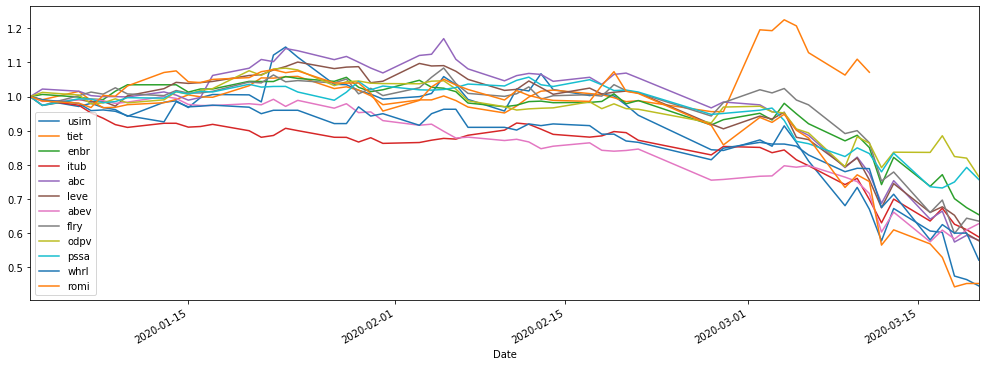

In [12]:
portfolio_normalizado = portfolio_acoes / portfolio_acoes.iloc[0]
portfolio_normalizado.plot(figsize=(17,6));

## Desempenho em % de cada ativo

In [41]:
desempenho = (portfolio_acoes.iloc[-1] - portfolio_acoes.iloc[0]) / portfolio_acoes.iloc[0]
desempenho = round(desempenho * 100, 2)
desempenho.sort_values()

usim   -55.46
romi   -54.76
whrl   -47.90
leve   -42.23
abc    -42.12
itub   -41.13
abev   -37.24
flry   -36.48
enbr   -34.60
pssa   -24.29
odpv   -23.44
tiet   -22.51
dtype: float64

## Retorno diário da carteira

In [13]:
portfolio_posicao['Retorno Diario'] = portfolio_posicao['Total'].pct_change(1)

In [14]:
# Média de retorno diário
round_ret_medio_diario = round(portfolio_posicao['Retorno Diario'].mean() * 100, 2)
print('Essa carteira rende em média {}% diariamente'.format(round_ret_medio_diario))

Essa carteira rende em média -0.7% diariamente


In [15]:
# Desvio Padrão do retorno diário
portfolio_posicao['Retorno Diario'].std()

0.046922436729356067

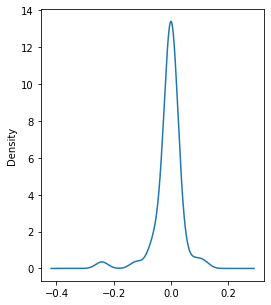

In [16]:
# Gráfico de densidade
portfolio_posicao['Retorno Diario'].plot(kind='kde', figsize=(4,5));

## Retorno Total da Carteira

In [17]:
retorno_total_acumulado = 100 * (portfolio_posicao['Total'][-1] / portfolio_posicao['Total'][0] - 1)
round_ret = round(retorno_total_acumulado, 3)
print('Essa carteira rendeu {} %'.format(round_ret))

Essa carteira rendeu -35.246 %


In [18]:
sharpe_ratio = (portfolio_posicao['Retorno Diario'].mean()) / portfolio_posicao['Retorno Diario'].std()
sharpe_ratio

-0.14875573111212897

In [19]:
sharpe_ratio_ano = (245 ** 0.5) * sharpe_ratio
sharpe_ratio_ano

-2.3283954876658055

## Retorno diário

In [20]:
retorno_diario = portfolio_acoes.pct_change(1)

## Gerando um único portfólio com posição atual

In [21]:
print(portfolio_acoes.columns)

# Gerando pesos aleatórios
print("Pesos Atuais")
print(pesos)

print("Rebalancear os pesos")
pesos = pesos / np.sum(pesos)
print(pesos)

# Retorno esperado
print("Retorno esperado")
ret_esp = np.sum( (retorno_diario.mean() * pesos) * 245 )
print(ret_esp)

# Volatilidade esperada
print("Volatilidade esperada")
vol_esp = np.sqrt( np.dot( pesos.T, np.dot( retorno_diario.cov() * 245, pesos ) ) )
print(vol_esp)

# Taxa de Sharpe
print("Sharpe Ratio")
sharpe = (ret_esp - 0.065) / vol_esp
print(sharpe)


Index(['usim', 'tiet', 'enbr', 'itub', 'abc', 'leve', 'abev', 'flry', 'odpv',
       'pssa', 'whrl', 'romi'],
      dtype='object')
Pesos Atuais
[0.55, 1.145, 0.439, 1.446, 0.218, 0.968, 0.694, 1.144, 0.164, 2.328, 0.878, 0.026]
Rebalancear os pesos
[0.055  0.1145 0.0439 0.1446 0.0218 0.0968 0.0694 0.1144 0.0164 0.2328
 0.0878 0.0026]
Retorno esperado
-1.8345828634432346
Volatilidade esperada
0.49254599900685614
Sharpe Ratio
-3.8566608342641167


## Gerando milhares de portfólios

In [22]:
num_portfolios = 1000
pesos_arr = np.zeros((num_portfolios, len(portfolio_acoes.columns)))
ret_esp_arr = np.zeros(num_portfolios)
vol_esp_arr = np.zeros(num_portfolios)
sharpe_arr = np.zeros(num_portfolios)

for ind in range(num_portfolios):

    # Pesos aleatórios
    pesos = np.array(np.random.random(len(tickers)))
    pesos = pesos / np.sum(pesos)
    pesos_arr[ind,:] = pesos

    # Retorno esperado
    ret_esp_arr[ind] = np.sum( (retorno_diario.mean() * pesos) * 245 )

    # Volatilidade esperada
    vol_esp_arr[ind] = np.sqrt( np.dot( pesos.T, np.dot( retorno_diario.cov() * 245, pesos ) ) )

    # Taxa de Sharpe
    sharpe_arr[ind] = (ret_esp_arr[ind] - 0.065) / vol_esp_arr[ind]

pesos_arr[sharpe_arr.argmax(),:]

array([0.00668942, 0.19058551, 0.18939391, 0.03178674, 0.00809553,
       0.0143255 , 0.09340061, 0.18777974, 0.18797253, 0.07410175,
       0.00805124, 0.00781753])

In [23]:
sharpe_arr.max()

-3.1955245637016074

In [24]:
sharpe_arr.argmax()

723

In [25]:
pesos_arr[sharpe_arr.argmax(),:]

array([0.00668942, 0.19058551, 0.18939391, 0.03178674, 0.00809553,
       0.0143255 , 0.09340061, 0.18777974, 0.18797253, 0.07410175,
       0.00805124, 0.00781753])

### Gerando CSV

In [26]:
itau.to_csv('csv/ITUB4.csv')
abev.to_csv('csv/ABEV3.csv')
usim.to_csv('csv/USIM5.csv')
pmam.to_csv('csv/PMAM3.csv')
flry.to_csv('csv/FLRY3.csv')
pssa.to_csv('csv/PSSA3.csv')
tiet.to_csv('csv/TIET4.csv')

NameError: name 'itau' is not defined